In [1]:
# Import dependencies.

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import re

In [33]:
import datetime as dt

In [54]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [56]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [57]:
# Reflect an existing database into a new model.
Base = automap_base()

# Reflect the tables.
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB.
session = Session(engine)

# Exploratory Climate Analysis

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores.
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [62]:
# Save the query results as a Pandas DataFrame and set the index to the date column.
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

In [63]:
# Print dataframe with index.
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [64]:
# Print dataframe without index to not have two date columns <as above>.
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [65]:
# Sort the dataframe by date.
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

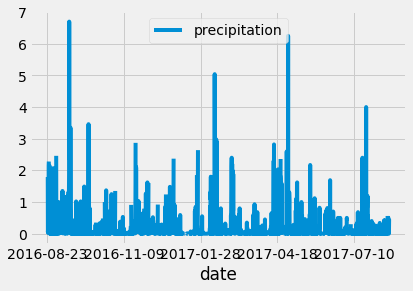

In [66]:
# Use Pandas Plotting with Matplotlib to plot the data.
df.plot()

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data.
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [68]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [69]:
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
	group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [71]:
# Create a query for the temperature observations.
session.query(Measurement.tobs)

In [72]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')

In [73]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [74]:
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [75]:
# Convert results to a dataframe.
df = pd.DataFrame(results, columns=['tobs'])
print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

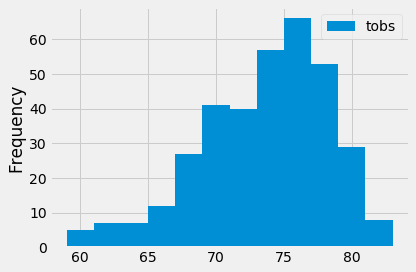

In [76]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()

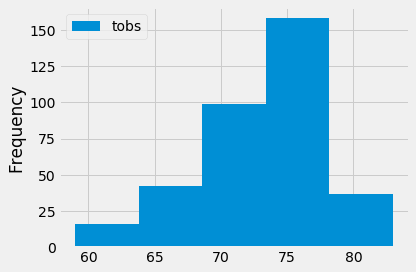

In [77]:
# Plot observations <5 bins>.
df.plot.hist(bins=5)
plt.tight_layout()

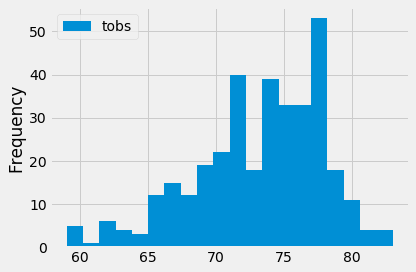

In [78]:
# Plot observations <20 bins>.
df.plot.hist(bins=20)
plt.tight_layout()

In [79]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2012-02-05', '2012-03-05'))

[(56.0, 69.62978723404255, 78.0)]


# Challenge

In [83]:
# Identify key statistical data in June across all of the stations and years using the describe() function.\

In [84]:
# Create variable to hold results
jun_data=[]

# Create query to pull data for June
jun_data = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).\
group_by(Measurement.date).all()

# Print data
jun_data

[('2010-06-01', 78.0, 0.0),
 ('2010-06-02', 76.0, 0.01),
 ('2010-06-03', 78.0, 0.0),
 ('2010-06-04', 76.0, 0.0),
 ('2010-06-05', 77.0, 0.0),
 ('2010-06-06', 78.0, 0.0),
 ('2010-06-07', 77.0, 0.0),
 ('2010-06-08', 78.0, 0.0),
 ('2010-06-09', 78.0, 0.0),
 ('2010-06-10', 79.0, 0.0),
 ('2010-06-11', 78.0, 0.0),
 ('2010-06-12', 78.0, 0.0),
 ('2010-06-13', 78.0, 0.0),
 ('2010-06-14', 77.0, 0.0),
 ('2010-06-15', 78.0, 0.0),
 ('2010-06-16', 78.0, 0.0),
 ('2010-06-17', 77.0, 0.0),
 ('2010-06-18', 77.0, 0.0),
 ('2010-06-19', 82.0, 0.0),
 ('2010-06-20', 78.0, 0.0),
 ('2010-06-21', 78.0, 0.0),
 ('2010-06-22', 78.0, 0.0),
 ('2010-06-23', 78.0, 0.0),
 ('2010-06-24', 78.0, 0.0),
 ('2010-06-25', 77.0, 0.0),
 ('2010-06-26', 76.0, 0.02),
 ('2010-06-27', 78.0, 0.0),
 ('2010-06-28', 78.0, 0.0),
 ('2010-06-29', 78.0, 0.0),
 ('2010-06-30', 78.0, 0.0),
 ('2011-06-01', 77.0, 0.07),
 ('2011-06-02', 78.0, 0.0),
 ('2011-06-03', 73.0, 0.56),
 ('2011-06-04', 70.0, 0.89),
 ('2011-06-05', 76.0, 0.0),
 ('2011-06-06',

In [93]:
# Convert results to dataframe
june_df = pd.DataFrame(jun_data, columns=['Date','Temp','Precipitation'])
june_df = june_df.sort_index()
june_df

,Date,Temp,Precipitation
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00
...,...,...,...
235,2017-06-26,81.0,0.00
236,2017-06-27,80.0,0.00
237,2017-06-28,79.0,0.00
238,2017-06-29,79.0,0.00


In [94]:
june_df.describe()

,Temp,Precipitation
count,240.000000,237.000000
mean,77.491667,0.023586
std,1.881404,0.089633
min,70.000000,0.000000
25%,77.000000,0.000000
50%,78.000000,0.000000
75%,79.000000,0.010000
max,84.000000,0.890000


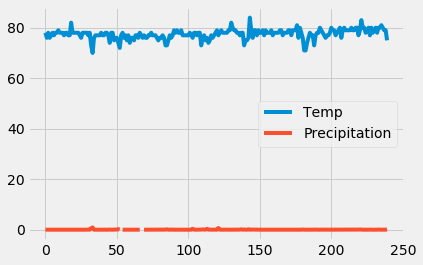

In [96]:
# Create graphs to create visuals for investors
june_df.plot()

In [85]:
# Identify key statistical data in December across all stations and years using the describe() function.

In [91]:
# Create variable to hold results
dec_data=[]

# Create query to pull data for December
dec_data = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).\
group_by(Measurement.date).all()

# Print data
dec_data

[('2010-12-01', 76.0, 0.04),
 ('2010-12-02', 72.0, 0.13),
 ('2010-12-03', 74.0, 0.0),
 ('2010-12-04', 74.0, 0.0),
 ('2010-12-05', 73.0, 0.0),
 ('2010-12-06', 64.0, 0.0),
 ('2010-12-07', 64.0, 0.0),
 ('2010-12-08', 67.0, 0.0),
 ('2010-12-09', 77.0, 0.0),
 ('2010-12-10', 66.0, 1.58),
 ('2010-12-11', 69.0, 0.77),
 ('2010-12-12', 68.0, 0.0),
 ('2010-12-13', 68.0, 0.0),
 ('2010-12-14', 71.0, 0.0),
 ('2010-12-15', 74.0, 0.0),
 ('2010-12-16', 67.0, 0.0),
 ('2010-12-17', 66.0, 0.0),
 ('2010-12-18', 69.0, 0.0),
 ('2010-12-19', 71.0, 1.4),
 ('2010-12-20', 71.0, 4.94),
 ('2010-12-21', 71.0, 0.43),
 ('2010-12-22', 71.0, 0.01),
 ('2010-12-23', 70.0, 0.0),
 ('2010-12-24', 70.0, 0.0),
 ('2010-12-25', 69.0, 2.95),
 ('2010-12-26', 74.0, None),
 ('2010-12-27', 74.0, 0.13),
 ('2010-12-28', 71.0, 0.55),
 ('2010-12-29', 75.0, 0.06),
 ('2010-12-30', 75.0, 0.01),
 ('2010-12-31', 72.0, 0.0),
 ('2011-12-01', 69.0, 0.03),
 ('2011-12-02', 68.0, 0.08),
 ('2011-12-03', 73.0, 0.0),
 ('2011-12-04', 74.0, 0.0),
 ('20

In [92]:
# Convert results to dataframe
dec_df = pd.DataFrame(dec_data, columns=['Date','Temp','Precipitation'])
dec_df = dec_df.sort_index()
dec_df

,Date,Temp,Precipitation
0,2010-12-01,76.0,0.04
1,2010-12-02,72.0,0.13
2,2010-12-03,74.0,0.00
3,2010-12-04,74.0,0.00
4,2010-12-05,73.0,0.00
...,...,...,...
212,2016-12-27,74.0,0.00
213,2016-12-28,71.0,0.02
214,2016-12-29,73.0,0.04
215,2016-12-30,69.0,0.12


In [95]:
dec_df.describe()

,Temp,Precipitation
count,217.000000,214.000000
mean,71.119816,0.112383
std,3.504550,0.454108
min,56.000000,0.000000
25%,69.000000,0.000000
50%,72.000000,0.000000
75%,74.000000,0.040000
max,77.000000,4.940000


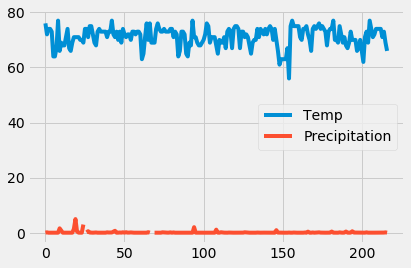

In [97]:
# Create graphs to create visuals for investors
dec_df.plot()